* ITBIN-2211-0272 - H.L.N.D.Rathnayaka
* ITBIN-2211-0188 - G.D.I.Gamage
* ITBIN-2211-0210 - T.H.S.T.Koushalya
* ITBIN-2211-0232 - R.A.P.Maheshika

# Crop Suitability Recommender - Mini Project 🌿

# 1.Identifying The Problem

This project aims to develop a Machine Learning-based Crop Suitability Recommender for Sri Lanka.It will use environmental factors such as rainfall, temperature, soil type, pH, and altitude to recommend the most suitable crops for each district.  

This addresses challenges such as:

* Low productivity

* Climate vulnerability

* Soil degradation


# 2.Data Understanding

* Load all four datasets

*  Print shape of each dataset

*  Data Types

* Missing Values

* Descriptive Statistics

* Target Distribution

* Feature Relationships

## Import Libraries

In [ ]:
# Data Understanding
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load datasets

In [14]:
# Load datasets (ensure these CSVs are in the working directory)
crop_df = pd.read_csv("/content/Crop_recommendation.csv")
location_df = pd.read_csv("/content/locationData.csv")
weather_df = pd.read_csv("/content/weatherData.csv")
climate_df = pd.read_csv("/content/Sri_Lanka_Climate_Data.csv")

# Preview
print("Crop Data:")
display(crop_df.head())

print("\nLocation Data:")
display(location_df.head())

print("\nWeather Data:")
display(weather_df.head())

print("\nClimate Data:")
display(climate_df.head())


Crop Data:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Location Data:


,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,1,7.065026,79.96622,19,19800,Asia/Colombo,530,Gampaha
2,2,6.572935,80.02519,5,19800,Asia/Colombo,530,Kalutara
3,3,7.275923,80.62659,499,19800,Asia/Colombo,530,Kandy
4,4,7.486819,80.52632,362,19800,Asia/Colombo,530,Matale



Weather Data:


,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07



Climate Data:


,date,latitude,longitude,temperature_2m_max,temperature_2m_min,precipitation_sum
0,2022-11-11 00:00:00+00:00,6.066667,80.231034,28.7975,24.4975,1.000000
1,2022-11-12 00:00:00+00:00,6.066667,80.231034,27.7475,23.2975,17.800001
2,2022-11-13 00:00:00+00:00,6.066667,80.231034,26.6475,23.2475,13.599999
3,2022-11-14 00:00:00+00:00,6.066667,80.231034,28.1475,22.8975,17.900002
4,2022-11-15 00:00:00+00:00,6.066667,80.231034,28.3475,22.6475,23.499998


#Basic exploration

Shapes:
Crop: (2200, 8)
Location: (27, 8)
Weather: (142371, 21)
Climate: (314028, 6)

Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
location_id              0
latitude                 0
longitude                0
elevation                0
utc_offset_seconds       0
timezone                 0
timezone_abbreviation    0
city_name                0
dtype: int64
location_id                        0
date                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wi

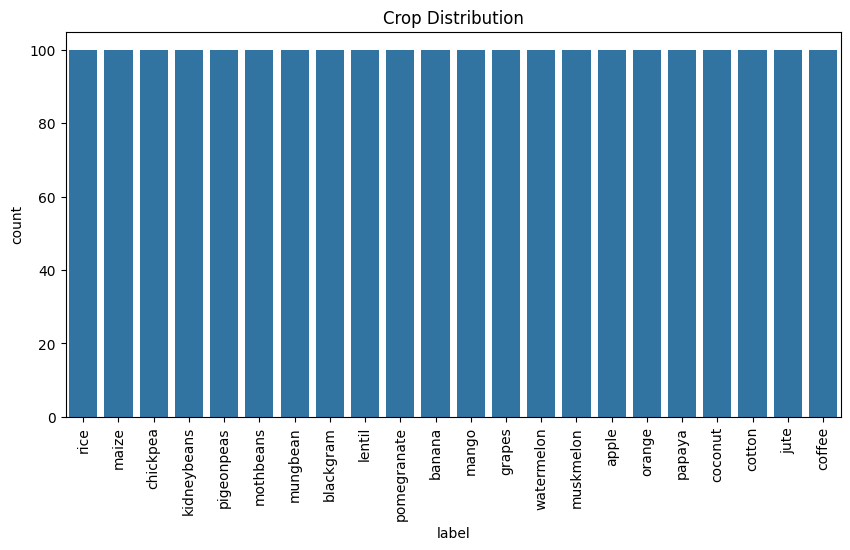

In [15]:
# Dataset shapes
print("Shapes:")
print("Crop:", crop_df.shape)
print("Location:", location_df.shape)
print("Weather:", weather_df.shape)
print("Climate:", climate_df.shape)

# Missing values
print("\nMissing Values:")
print(crop_df.isnull().sum())
print(location_df.isnull().sum())
print(weather_df.isnull().sum())
print(climate_df.isnull().sum())

# Example visualization
plt.figure(figsize=(10,5))
sns.countplot(data=crop_df, x='label', order=crop_df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()


## 3.Data Preprocessing

# Merge & clean

* Merge dataset

* Clean data

* Transform data

* Feature selection

* Split data


In [20]:
# Merge location, climate, and weather datasets on latitude and longitude
df_merged_location_climate_weather = location_df.merge(climate_df, on=["latitude", "longitude"], how="left") \
                                                .merge(weather_df, on=["location_id", "date"], how="left")

print("\nMerged Location, Climate, and Weather Dataset Shape:", df_merged_location_climate_weather.shape)
display(df_merged_location_climate_weather.head())


Merged Location, Climate, and Weather Dataset Shape: (27, 31)


,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name,date,temperature_2m_max,...,precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset
0,0,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.065026,79.96622,19,19800,Asia/Colombo,530,Gampaha,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6.572935,80.02519,5,19800,Asia/Colombo,530,Kalutara,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7.275923,80.62659,499,19800,Asia/Colombo,530,Kandy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7.486819,80.52632,362,19800,Asia/Colombo,530,Matale,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.Data Mining & Model Training

# Train/Test split

In [25]:
# Assuming X_scaled and y are defined from previous steps
# After defining X and y from your merged data and scaling X to X_scaled
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8583333333333333
              precision    recall  f1-score   support

      Banana       0.76      0.65      0.70        60
      Coffee       0.89      0.80      0.84        60
      Cotton       0.97      1.00      0.98        60
       Maize       0.82      0.83      0.83        60
        Rice       0.81      0.83      0.82        60
   Sugarcane       0.82      0.90      0.86        60
         Tea       0.98      1.00      0.99        60
       Wheat       0.81      0.85      0.83        60

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



# KNN

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8520833333333333
              precision    recall  f1-score   support

      Banana       0.66      0.63      0.64        60
      Coffee       0.89      0.90      0.89        60
      Cotton       0.92      1.00      0.96        60
       Maize       0.84      0.82      0.83        60
        Rice       0.74      0.82      0.78        60
   Sugarcane       0.88      0.87      0.87        60
         Tea       1.00      1.00      1.00        60
       Wheat       0.89      0.78      0.83        60

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



# 5.Evaluation & Interpretation

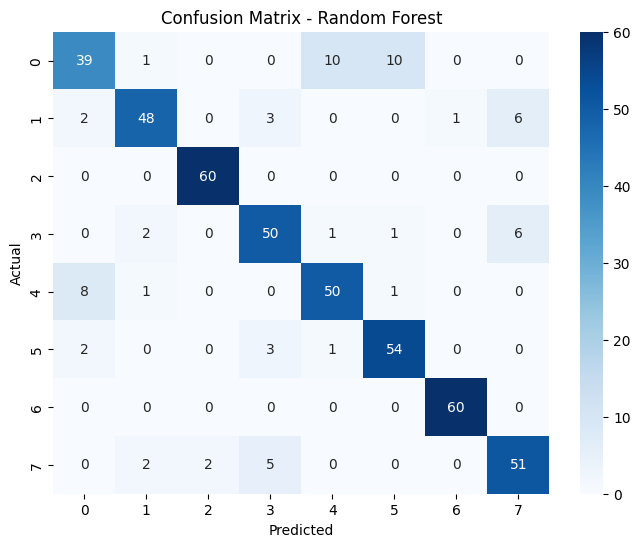

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# 6.Deployment Preparation

# Save Model

In [33]:
# Select best model
best_model = rf_model if accuracy_score(y_test, y_pred_rf) >= accuracy_score(y_test, y_pred_knn) else knn_model

# Save for deployment
joblib.dump(best_model, "crop_recommender_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model, encoder, and scaler saved.")

Model, encoder, and scaler saved.
